In [134]:
## Import dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE

In [216]:
## Import data 
train_df = pd.read_csv("train.csv")
customer_df = pd.read_csv("customer.csv")
test_df = pd.read_csv("test.csv")

In [137]:
train_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,59383,2021-08-01 00:04:37,323,217,4.60,0
1,59384,2021-08-01 00:12:10,6,429,8.61,0
2,59385,2021-08-01 00:12:34,714,1011,64.00,0
3,59386,2021-08-01 00:15:40,266,1969,12.72,0
4,59387,2021-08-01 00:16:01,890,1482,98.88,0
...,...,...,...,...,...,...
291226,350609,2021-12-30 23:33:02,221,41,61.26,0
291227,350610,2021-12-30 23:46:15,101,761,58.80,0
291228,350611,2021-12-30 23:54:38,7,1991,15.08,0
291229,350612,2021-12-30 23:56:36,161,1166,54.24,0


In [138]:
customer_df

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8
...,...,...,...,...,...,...,...,...
995,995,43.216661,36.225882,58.023111,29.011555,0.305376,"[264, 309, 395, 412, 483, 637, 652, 656, 906, ...",17
996,996,4.034602,51.110309,7.707631,3.853816,0.238208,"[32, 83, 194, 239, 280, 520, 570, 752, 1088, 1...",14
997,997,37.634146,6.177907,41.619615,20.809807,0.967002,"[147, 148, 185, 413, 957, 1160, 1426, 1590, 16...",10
998,998,18.777030,40.467983,16.390871,8.195436,1.398557,"[138, 577, 602, 825, 950, 966, 1095, 1157, 124...",21


## Exploratory Data Analysis

1. Average number of transactions per customer 
2. Are we able to create cluster for the different transaction amount and the location
3. How many terminals are visited by customers on average 
4. 

In [139]:
## Check for missing values in the data frame 
train_df.isna().sum()

TRANSACTION_ID    0
TX_DATETIME       0
CUSTOMER_ID       0
TERMINAL_ID       0
TX_AMOUNT         0
TX_FRAUD          0
dtype: int64

In [140]:
customer_df.isna().sum()

CUSTOMER_ID            0
x_customer_id          0
y_customer_id          0
mean_amount            0
std_amount             0
mean_nb_tx_per_day     0
available_terminals    0
nb_terminals           0
dtype: int64

In [141]:
## Looking for outliers
train_df.describe()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
count,291231.000000,291231.000000,291231.000000,291231.000000,291231.000000
mean,204998.000000,496.256202,993.718526,53.182274,0.022601
std,84071.292461,285.274966,575.267551,39.573329,0.148627
min,59383.000000,0.000000,0.000000,0.000000,0.000000
25%,132190.500000,249.000000,496.000000,21.130000,0.000000
50%,204998.000000,498.000000,1000.000000,44.770000,0.000000
75%,277805.500000,741.000000,1483.000000,76.850000,0.000000
max,350613.000000,999.000000,1999.000000,291.150000,1.000000


In [142]:
customer_df.describe()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,51.318204,50.397990,51.550697,25.775348,1.956983,15.117000
std,288.819436,28.893939,28.785699,28.025746,14.012873,1.165512,4.255987
min,0.000000,0.007245,0.036734,5.063101,2.531550,0.000295,2.000000
25%,249.750000,27.099437,26.737835,27.596718,13.798359,0.931062,12.000000
50%,499.500000,50.601090,49.109879,51.596026,25.798013,1.886714,15.000000
75%,749.250000,76.422770,76.377724,75.304416,37.652208,2.994755,18.000000
max,999.000000,99.994897,99.996402,99.981815,49.990907,3.999725,28.000000


In [143]:
## Distribution of fraudulent vs non fraudulent transactions
train_df['TX_FRAUD'].value_counts(normalize = 'True')

0    0.977399
1    0.022601
Name: TX_FRAUD, dtype: float64

Immediately, the dataset appears to have no missing data. As expected the dataset is highly imbalanced. So we have to look into techniques that will create synthetic data for the negative transactions to balance out the dataset. 

The first question we want to answer if we can find significant cluster in our customer file. If we are able to find significant clustering, then we cann use this feature in place of a number of features in the original customer dataset and reduce our classifier's complexity.

In [144]:
## Clustering the customers 
from sklearn.cluster import KMeans

In [145]:
## feature engineering for the knn model 
X = customer_df.copy()
X = X.drop(columns = 'available_terminals')

## fit the clustering model
model = KMeans(n_clusters = 5, n_init = 'auto',random_state = 42).fit(X)

C:\Users\Agnes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [146]:
# Add cluster value to the model 
X['cluster'] = model.labels_
X['cluster'] = X['cluster'].astype('category')
## Get the mean of each cluster
X.groupby(['cluster']).mean()

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,nb_terminals
cluster,,,,,,,
0,105.0,49.883358,48.233606,52.324323,26.162161,1.962185,15.061611
1,517.0,54.084981,52.306988,48.472673,24.236336,1.897456,15.088670
2,906.5,48.524822,49.594657,49.708980,24.854490,1.858759,15.204301
3,313.0,53.287557,53.579226,52.204917,26.102459,2.034649,14.887805
4,716.0,50.584605,48.174526,54.986839,27.493420,2.025364,15.364103


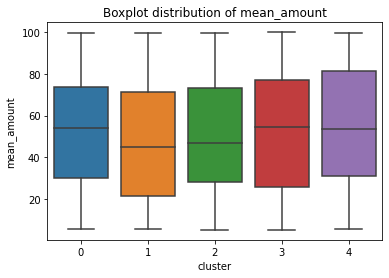

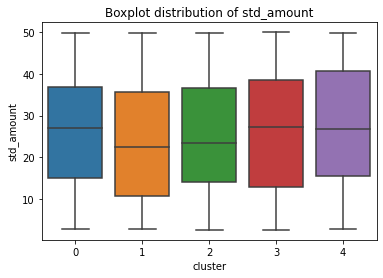

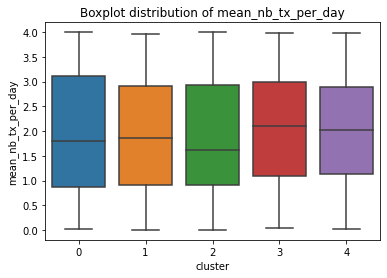

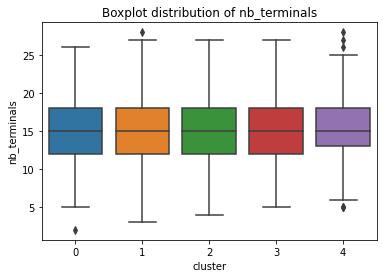

In [147]:
## Boxplot distribution by cluster 
columns = ['mean_amount', 'std_amount','mean_nb_tx_per_day','nb_terminals']
for col in columns:
    plt.figure()
    sns.boxplot(data = X, x = 'cluster', y = col).set(title = f'Boxplot distribution of {col}' )

Based on the boxplot, we don't see really any significant differences between the clusters we have uncovered. This suggests including cluster information will not help us significantly when we develop our classifier. Let's also examine the distribution for our different features.

<Figure size 432x288 with 0 Axes>

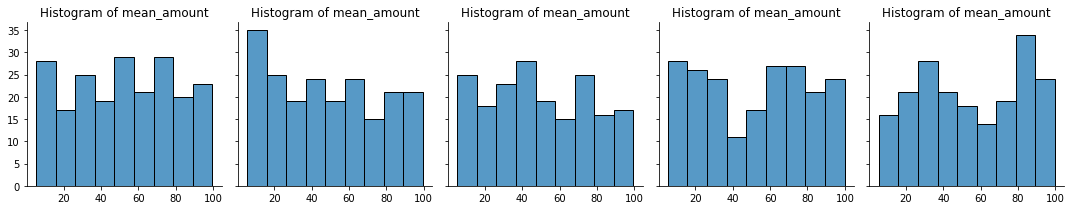

<Figure size 432x288 with 0 Axes>

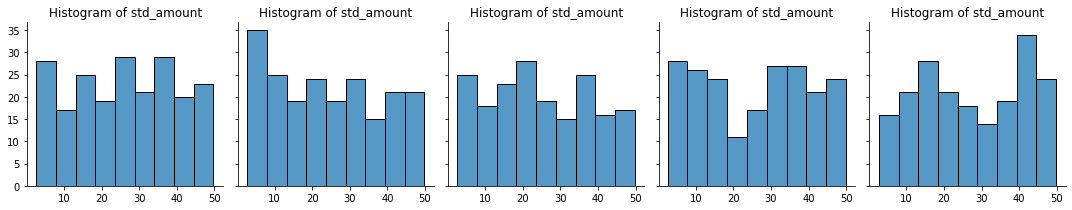

<Figure size 432x288 with 0 Axes>

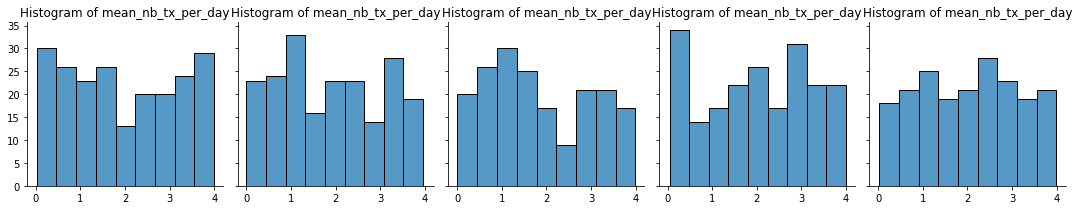

<Figure size 432x288 with 0 Axes>

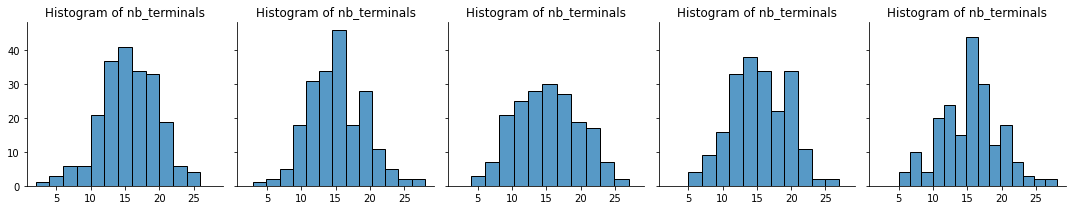

In [148]:
for col in columns:
    plt.figure()
    ax = sns.FacetGrid(data = X, col = 'cluster')  
    ax.map_dataframe(sns.histplot, x = col)
    ax.set(title = f'Histogram of {col}',label ='col')

All the features apart from nb_terminals seem to have a fairly uniform distribution

The next question we will like to resolve is the imbalance in our dataset. This intervenes when we have to split our dataset in training and test set and also when we are training our models.

In [150]:
## Splitting data into training and test sets:
from sklearn.model_selection import train_test_split
X = train_df.loc[:,['TRANSACTION_ID','TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID','TX_AMOUNT' ]]
y = train_df.loc[:,'TX_FRAUD']

##  Transform date into datetime 
X['TX_DATETIME'] = pd.to_datetime(X['TX_DATETIME'])

## Create a month feature
X['TX_DATETIME_MONTH'] = X['TX_DATETIME'].dt.month

## Create a day feature 
X['TX_DATETIME_DAY'] = X['TX_DATETIME'].dt.day

## Create Hour feature 
X['TX_DATETIME_HOUR'] = X['TX_DATETIME'].dt.hour

## Drop the date feature from X
X = X.drop(columns = 'TX_DATETIME')

X_train,X_test, y_train, y_test = train_test_split(X,y,shuffle = False, random_state = 42)

In [152]:
X_train

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_DATETIME_MONTH,TX_DATETIME_DAY,TX_DATETIME_HOUR
0,59383,323,217,4.60,8,1,0
1,59384,6,429,8.61,8,1,0
2,59385,714,1011,64.00,8,1,0
3,59386,266,1969,12.72,8,1,0
4,59387,890,1482,98.88,8,1,0
...,...,...,...,...,...,...,...
218418,277801,439,721,30.83,11,23,6
218419,277802,165,1951,20.10,11,23,6
218420,277803,887,1548,56.36,11,23,6
218421,277804,475,1174,61.50,11,23,6


In [153]:
y_train.value_counts(normalize = True)

0    0.977507
1    0.022493
Name: TX_FRAUD, dtype: float64

In [154]:
y_test.value_counts(normalize = True)

0    0.977077
1    0.022923
Name: TX_FRAUD, dtype: float64

In [155]:
 ## transform the dataset
oversample = SMOTE()
X_train_oversample, y_train_oversample = oversample.fit_resample(X_train, y_train)

In [156]:
X_train_oversample

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_DATETIME_MONTH,TX_DATETIME_DAY,TX_DATETIME_HOUR
0,59383,323,217,4.600000,8,1,0
1,59384,6,429,8.610000,8,1,0
2,59385,714,1011,64.000000,8,1,0
3,59386,266,1969,12.720000,8,1,0
4,59387,890,1482,98.880000,8,1,0
...,...,...,...,...,...,...,...
427015,86408,792,321,111.912055,8,15,6
427016,220846,586,1059,55.494308,10,24,11
427017,83317,805,1328,19.984721,8,13,12
427018,174692,392,1493,12.739517,9,30,7


Now that we have increased our dataset, let's test a couple of models and see what the accuracy is.

## Decision Tree 

The first model we are going to try is a simple decision tree. This will serve as a baseline for the other models we will explore later on.

In [157]:
## import decision tree model
from sklearn.tree import DecisionTreeClassifier

## First we use the initial datasets without oversampling
DT = DecisionTreeClassifier(random_state = 42).fit(X_train,y_train)

##Make predictions based on fitted model
y_predict = DT.predict(X_test)

## Evaluate the model using precision
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_predict)

print(f"The precision score is :  {precision :.3f}" )
print("\n")
## Feature importances 
for i,v in zip(DT.feature_names_in_,DT.feature_importances_):
    print(f"Feature {i} :   importance:{v}")

The precision score is :  0.073


Feature TRANSACTION_ID :   importance:0.3702534257164854
Feature CUSTOMER_ID :   importance:0.0922230844220192
Feature TERMINAL_ID :   importance:0.28788221335839975
Feature TX_AMOUNT :   importance:0.13599218612196678
Feature TX_DATETIME_MONTH :   importance:0.011029645306351858
Feature TX_DATETIME_DAY :   importance:0.0592811808163266
Feature TX_DATETIME_HOUR :   importance:0.04333826425845045


In [158]:
## With oversampling
DT = DecisionTreeClassifier(random_state = 42).fit(X_train_oversample,y_train_oversample)

##Make predictions based on fitted model
y_predict = DT.predict(X_test)

## Evaluate the model using precision
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_predict)

print(f"The precision score is :  {precision :.3f}" )

print("\n")

## Feature importances 
for i,v in zip(DT.feature_names_in_,DT.feature_importances_):
    print(f"Feature {i} :   importance:{v}")

The precision score is :  0.025


Feature TRANSACTION_ID :   importance:0.3460153619445895
Feature CUSTOMER_ID :   importance:0.1808496874405331
Feature TERMINAL_ID :   importance:0.15725369613864584
Feature TX_AMOUNT :   importance:0.1292736064312942
Feature TX_DATETIME_MONTH :   importance:0.002217337403066467
Feature TX_DATETIME_DAY :   importance:0.0854965586500187
Feature TX_DATETIME_HOUR :   importance:0.09889375199185231


Using the augmented dataset yields worse outcomes compared to the original score. This is different than what we expected. Based on the feature importances, Transaction ID,Terminal ID 

## Random Forest 

In [222]:
def make_predictions(model,X_train,y_train,X_test,y_test):
    ## Fit the model 
    model.fit(X_train,y_train)
    
    ##Make predictions
    y_predict = model.predict(X_test)
    y_train_predict = model.predict(X_train)
    
    ##Compute precision
    precision = precision_score(y_test,y_predict)
    train_precision = precision_score(y_train,y_train_predict)
    print(f"The training set precision score is : {train_precision:.3f}")
    print(f"The test precision score is :  {precision :.3f}" )
    
    return model,y_predict, precision

In [223]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=150, criterion='gini',
                            max_depth=None, min_samples_split=20, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='sqrt', max_leaf_nodes=None,bootstrap=True, 
                            n_jobs=-1, random_state=42, verbose=0,
                            warm_start=True, class_weight=None, ccp_alpha=0.0, max_samples=None)

model,y_predict,precision =  make_predictions(RF,X_train,y_train,X_test,y_test)

print('\n')
## Feature importances 
for i,v in zip(RF.feature_names_in_, RF.feature_importances_):
    print(f"Feature {i} :   importance:{v}")

The training set precision score is : 0.980
The test precision score is :  0.750


Feature TRANSACTION_ID :   importance:0.2106328921391684
Feature CUSTOMER_ID :   importance:0.038609900746576324
Feature TERMINAL_ID :   importance:0.1594202809382569
Feature TX_AMOUNT :   importance:0.14083784657797263
Feature x_customer_id :   importance:0.04653502515372867
Feature y_customer_id :   importance:0.045934673315250106
Feature mean_amount :   importance:0.03648169874257018
Feature std_amount :   importance:0.036234048150069136
Feature mean_nb_tx_per_day :   importance:0.042211054646343685
Feature nb_terminals :   importance:0.027236104298711896
Feature in_terminal_range :   importance:0.0
Feature TX_DATETIME_MONTH :   importance:0.0390538545581018
Feature TX_DATETIME_DAY :   importance:0.12073182061088311
Feature TX_DATETIME_HOUR :   importance:0.05608080012236719


In [161]:
## Using the augmented dataset 
RF = RandomForestClassifier(n_estimators=150, criterion='gini',
                            max_depth=None, min_samples_split=20, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='sqrt', max_leaf_nodes=None,bootstrap=True, 
                            n_jobs=-1, random_state=42, verbose=0,
                            warm_start=True, class_weight=None, ccp_alpha=0.0, max_samples=None)

make_predictions(RF,X_train_oversample,y_train_oversample,X_test,y_test)
print('\n')

## Feature importances 
for i,v in zip(RF.feature_names_in_, RF.feature_importances_):
    print(f"Feature {i} :   importance:{v}")

The training set precision score is : 0.982
The test precision score is :  0.028


Feature TRANSACTION_ID :   importance:0.2534386669957965
Feature CUSTOMER_ID :   importance:0.1888446171514283
Feature TERMINAL_ID :   importance:0.17782034688070808
Feature TX_AMOUNT :   importance:0.14004972155056766
Feature TX_DATETIME_MONTH :   importance:0.018023865270151443
Feature TX_DATETIME_DAY :   importance:0.12263540018355938
Feature TX_DATETIME_HOUR :   importance:0.09918738196778872


There appears to be no benefit to using the augmented dataset so we will use our original dataset. With the original dataset, the random forest classifier appears to be overfiit

## XGBOOST

In [162]:
from xgboost import XGBClassifier

In [111]:
## Tweeking the scale_pos_weight parameter
w_values = np.arange(90,100,1)
for w in w_values:
    print(w)
    xgb = XGBClassifier(n_estimators = 2000, scale_pos_weight=w)
    y_predict, precision = make_predictions(xgb,X_train,y_train,X_test,y_test)
    print("\n")


90
The training set precision score is : 0.999
The test precision score is :  0.204


91
The training set precision score is : 0.999
The test precision score is :  0.193


92
The training set precision score is : 0.999
The test precision score is :  0.219


93
The training set precision score is : 0.999
The test precision score is :  0.217


94
The training set precision score is : 0.999
The test precision score is :  0.188


95
The training set precision score is : 0.999
The test precision score is :  0.183


96
The training set precision score is : 0.999
The test precision score is :  0.230


97
The training set precision score is : 0.999
The test precision score is :  0.197


98
The training set precision score is : 0.999
The test precision score is :  0.226


99
The training set precision score is : 0.999
The test precision score is :  0.225




## SVM 

In [163]:
from sklearn.svm import SVC 

In [164]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [165]:
y_predict = svm.predict(X_test)
precision_score(y_test,y_predict)

C:\Users\Agnes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

Support Vector Machines perform the worst out of all the algorithms we have tried so far. 

In [115]:
from sklearn.neighbors import KNeighborsClassifier as knn

knn_model.fit(X_train,y_train)

knn_model = knn(n_neighbors = 10)
make_predictions(knn_model,X_train,y_train,X_test,y_test)

## Adding the customer feature set 
Up till now we have not included the customer feature set. Let's compare the models performance with the increased features. 

In [112]:
## Merge train_df and customer_df 
merged_df = train_df.merge(right = customer_df,
                            how = 'left',
                            left_on = 'CUSTOMER_ID',
                            right_on = 'CUSTOMER_ID')

In [182]:
len(merged_df)

291231

is Terminal_ID in avaialable_terminals 
d


In [176]:
terminal_flag = [] 
for row in merged_df.iterrows():
    flag = str(row[1]['TERMINAL_ID']) in row[1]['available_terminals'] 
    terminal_flag.append(flag)

In [184]:
merged_df['in_terminal_range'] = terminal_flag

In [185]:
merged_df[merged_df['in_terminal_range'] == False].sum()

TRANSACTION_ID         0.0
TX_DATETIME            0.0
CUSTOMER_ID            0.0
TERMINAL_ID            0.0
TX_AMOUNT              0.0
TX_FRAUD               0.0
x_customer_id          0.0
y_customer_id          0.0
mean_amount            0.0
std_amount             0.0
mean_nb_tx_per_day     0.0
available_terminals    0.0
nb_terminals           0.0
terminal_flag          0.0
in_terminal_range      0.0
dtype: float64

All the transactions in the dataset happen within the 5 mile radius for every customer.  

In [189]:
customer_df

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals,nb_terminals
0,0,54.881350,71.518937,62.262521,31.131260,2.179533,"[29, 87, 144, 241, 330, 858, 996, 1028, 1067, ...",22
1,1,42.365480,64.589411,46.570785,23.285393,3.567092,"[5, 160, 242, 378, 431, 475, 571, 762, 876, 93...",20
2,2,96.366276,38.344152,80.213879,40.106939,2.115580,"[316, 406, 447, 523, 968, 1200, 1318, 1365, 16...",10
3,3,56.804456,92.559664,11.748426,5.874213,0.348517,"[65, 94, 113, 364, 401, 433, 485, 651, 672, 77...",17
4,4,2.021840,83.261985,78.924891,39.462446,3.480049,"[372, 614, 774, 1362, 1446, 1564, 1637, 1939]",8
...,...,...,...,...,...,...,...,...
995,995,43.216661,36.225882,58.023111,29.011555,0.305376,"[264, 309, 395, 412, 483, 637, 652, 656, 906, ...",17
996,996,4.034602,51.110309,7.707631,3.853816,0.238208,"[32, 83, 194, 239, 280, 520, 570, 752, 1088, 1...",14
997,997,37.634146,6.177907,41.619615,20.809807,0.967002,"[147, 148, 185, 413, 957, 1160, 1426, 1590, 16...",10
998,998,18.777030,40.467983,16.390871,8.195436,1.398557,"[138, 577, 602, 825, 950, 966, 1095, 1157, 124...",21


In [201]:
def check_terminal_range(terminal_id, customer_id,customer_df):
    '''Function to determine whether a given terminal is in the available range of terminals a customer usually uses.
        This will help us flag strange transactions
        Returns True if customer in the accepted range and 0 otherwise'''
    temp = customer_df.copy()
    temp = temp.set_index('CUSTOMER_ID')
    terminal_id = str(terminal_id)
    if terminal_id in temp.loc[customer_id,'available_terminals']:
        return True
    else:
        return False

In [202]:
check_terminal_range?

In [209]:
## Feature engineering:
y = train_df.loc[:,'TX_FRAUD']
X = merged_df.drop(columns = ['available_terminals','TX_FRAUD'])

##  Transform date into datetime 
X['TX_DATETIME'] = pd.to_datetime(X['TX_DATETIME'])

## Create a month feature
X['TX_DATETIME_MONTH'] = X['TX_DATETIME'].dt.month

## Create a day feature 
X['TX_DATETIME_DAY'] = X['TX_DATETIME'].dt.day

## Create Hour feature 
X['TX_DATETIME_HOUR'] = X['TX_DATETIME'].dt.hour

## Drop the date feature from X
X = X.drop(columns = 'TX_DATETIME')

X_train,X_test, y_train, y_test = train_test_split(X,y,shuffle = False, random_state = 42)


In [211]:
## Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)
make_predictions(dt,X_train,y_train,X_test,y_test)

The training set precision score is : 1.000
The test precision score is :  0.120


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64), 0.1196236559139785)

In [212]:
## Random Forest 
RF = RandomForestClassifier(n_estimators=250, criterion='gini',
                            max_depth=None, min_samples_split=20, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='sqrt', max_leaf_nodes=None,bootstrap=True, 
                            n_jobs=-1, random_state=42, verbose=0,
                            warm_start=True, class_weight=None, ccp_alpha=0.0, max_samples=None)

make_predictions(RF,X_train,y_train,X_test,y_test)

print('\n')
## Feature importances 
for i,v in zip(RF.feature_names_in_, RF.feature_importances_):
    print(f"Feature {i} :   importance:{v}")

The training set precision score is : 0.980
The test precision score is :  0.750


Feature TRANSACTION_ID :   importance:0.2106328921391684
Feature CUSTOMER_ID :   importance:0.038609900746576324
Feature TERMINAL_ID :   importance:0.1594202809382569
Feature TX_AMOUNT :   importance:0.14083784657797263
Feature x_customer_id :   importance:0.04653502515372867
Feature y_customer_id :   importance:0.045934673315250106
Feature mean_amount :   importance:0.03648169874257018
Feature std_amount :   importance:0.036234048150069136
Feature mean_nb_tx_per_day :   importance:0.042211054646343685
Feature nb_terminals :   importance:0.027236104298711896
Feature in_terminal_range :   importance:0.0
Feature TX_DATETIME_MONTH :   importance:0.0390538545581018
Feature TX_DATETIME_DAY :   importance:0.12073182061088311
Feature TX_DATETIME_HOUR :   importance:0.05608080012236719


In [213]:
## XGBoost

## Tweeking the scale_pos_weight parameter
w_values = np.arange(90,100,1)
for w in w_values:
    print(w)
    xgb = XGBClassifier(n_estimators = 2000, scale_pos_weight=w)
    y_predict, precision = make_predictions(xgb,X_train,y_train,X_test,y_test)
    print("\n")


90
The training set precision score is : 1.000
The test precision score is :  0.217


91
The training set precision score is : 1.000
The test precision score is :  0.204


92
The training set precision score is : 1.000
The test precision score is :  0.192


93
The training set precision score is : 1.000
The test precision score is :  0.212


94
The training set precision score is : 1.000
The test precision score is :  0.203


95
The training set precision score is : 1.000
The test precision score is :  0.208


96
The training set precision score is : 1.000
The test precision score is :  0.227


97
The training set precision score is : 1.000
The test precision score is :  0.200


98
The training set precision score is : 1.000
The test precision score is :  0.195


99
The training set precision score is : 1.000
The test precision score is :  0.216




We obtain the best precision score on the test dataset for scale_pos_weight = 0.98. For all the values of scale_pos_weight, we see XGBoost overfits to the training set.

**Conclusion:**

Of all the models we have explored, we get better performance with the random forest model. Initially, I was expecting the xgboost model to outperform random forest but that is not what we see in practice. Secondly, artificially augmenting the dataset using SMOTE did not improve the model performance

In [241]:
## Test df

## Feature engineering 

##1 . Merge df
df1 = test_df.merge(right = customer_df,
                            how = 'left',
                            left_on = 'CUSTOMER_ID',
                            right_on = 'CUSTOMER_ID')



## Add in terminal range 
terminal_flag = [] 
for row in df1.iterrows():
    flag = str(row[1]['TERMINAL_ID']) in row[1]['available_terminals'] 
    terminal_flag.append(flag)

df1['in_terminal_range'] = terminal_flag

## Feature engineering:
X = df1.drop(columns = ['available_terminals'])

##  Transform date into datetime 
X['TX_DATETIME'] = pd.to_datetime(X['TX_DATETIME'])

## Create a month feature
X['TX_DATETIME_MONTH'] = X['TX_DATETIME'].dt.month

## Create a day feature 
X['TX_DATETIME_DAY'] = X['TX_DATETIME'].dt.day

## Create Hour feature 
X['TX_DATETIME_HOUR'] = X['TX_DATETIME'].dt.hour

## Drop the date feature from X
X = X.drop(columns = 'TX_DATETIME')


In [244]:
## Random Forest 
RF = RandomForestClassifier(n_estimators=250, criterion='gini',
                            max_depth=None, min_samples_split=20, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='sqrt', max_leaf_nodes=None,bootstrap=True, 
                            n_jobs=-1, random_state=42, verbose=0,
                            warm_start=True, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [245]:
model,y_predict,precision =  make_predictions(RF,X_train,y_train,X_test,y_test)

The training set precision score is : 0.980
The test precision score is :  0.610


In [280]:
y_test_predict = model.predict(X)
y_test_predict = pd.DataFrame(y_test_predict,index = df1.TRANSACTION_ID,columns = ['TX_FRAUD']).reset_index()



In [285]:
result = y_test_predict[y_test_predict['TRANSACTION_ID'] >= 524230]
result.set_index('TRANSACTION_ID',inplace = True)
## Save to CSV 
result.to_csv("Output.csv")